In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


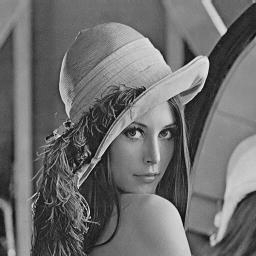

In [23]:
img = cv2.imread('/content/gdrive/My Drive/colab/images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg1.shape)
# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [24]:
gOutimg = np.zeros((gimg1.shape[0], gimg1.shape[1]))

주어진 코드에서 gimg1의 각 픽셀 값에 대해 val = gimg1[h, w] % 64 연산을 수행하고 있습니다. 이 연산은 각 픽셀 값을 64로 나눈 나머지를 구하므로, 결과적으로 gOutimg의 픽셀 값은 0에서 63 사이의 값으로 제한됩니다. 이는 그레이스케일 이미지에서 0은 검은색, 63은 매우 어두운 회색을 의미하기 때문에 전체적으로 이미지가 어두워지는 결과를 초래합니다.

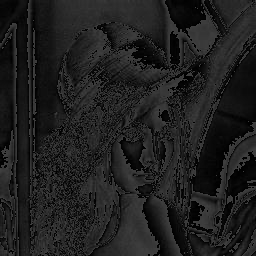

In [25]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    val = gimg1[h, w] % 64
    gOutimg[h,w] = val

# plt.imshow(gimg, cmap='gray')
cv2_imshow(gOutimg)

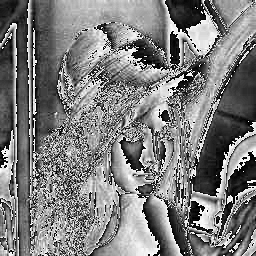

In [26]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    val = gimg1[h, w] % 64
    val = val *4
    gOutimg[h,w] = val

# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gOutimg)

In [29]:
equalVal = 200
width = 5

min = equalVal - width
max = equalVal + width



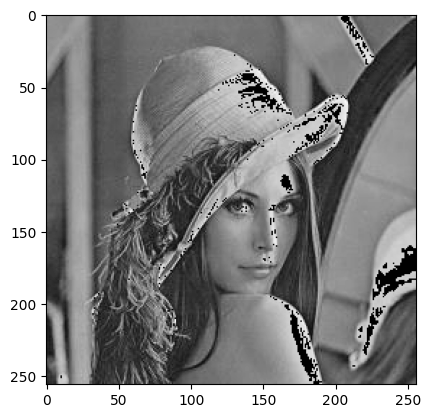

In [30]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h, w] > min and gimg1[h, w] < max):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = gimg1[h, w]
plt.imshow(gOutimg, cmap='gray')
# cv2_imshow(gOutimg)

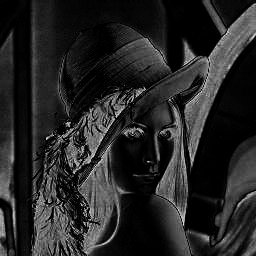

In [31]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = 255 * (gimg1[h, w] / 128 - 1) * (gimg1[h, w] / 128 - 1)
    gOutimg[h, w] = val
# plt.imshow(gOutimg, cmap='gray')
cv2_imshow(gOutimg)


In [32]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2


비트평면

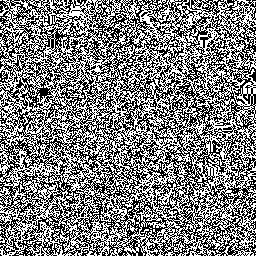

In [33]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    imVal = (int)(gimg1[h, w]/planeValue)
    if(imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255
# plt.imshow(gOutimg, cmap='gray')

cv2_imshow(gOutimg)

(286, 322)


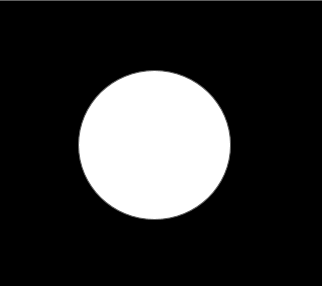

In [34]:
img = cv2.imread('/content/gdrive/My Drive/colab/images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg2 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg2.shape)
# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg2)

워터마크 만들기


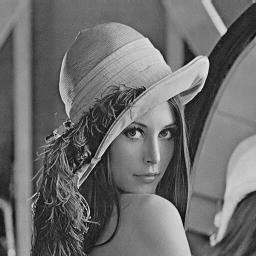

In [35]:
gWaterMarker = gimg1.copy()

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    imgVal = gimg2[h, w]
    if(imgVal == 128):
      # 최하위 비트가 0
      if(gimg1[h, w] % 2 == 0):
        gWaterMarker[h, w] += 1
    else:
      # 최하위 비트에 워터마크 세팅
      if(gimg1[h, w] % 2 == 1):
        gWaterMarker[h, w] -= 1

cv2_imshow(gWaterMarker)


In [50]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber - 1):
  planeValue = planeValue * 2

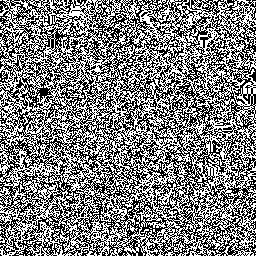

In [51]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = int(gWaterMarker[h, w] / planeValue)
    if(imVal % 2 == 0):
      gWaterMarker[h, w] = 0
    else:
      gWaterMarker[h, w] = 255

# 비트 평면 변환 결과 출력
cv2_imshow(gOutimg)
